# Exploratory data analysis

This notebook validates and explores the created cholera outbreaks dataset and the essential climate variables sea surface salinity, chlorophyll-a concentration and land surface temperature.

In [1]:
# import packages
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Cholera outbreaks

Load the cholera outbreaks data and explore it briefly.

In [2]:
outbreaks = gpd.read_file('../data/cholera_outbreaks/monthly_cholera_outbreaks_per_district_2010_2018.shp')

In [3]:
outbreaks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
outbreaks.shape

(466, 6)

In [5]:
outbreaks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   state     466 non-null    object  
 1   district  466 non-null    object  
 2   year      466 non-null    int64   
 3   month     466 non-null    int64   
 4   outbreak  466 non-null    int64   
 5   geometry  466 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 22.0+ KB


In [6]:
outbreaks.head()

,state,district,year,month,outbreak,geometry
0,himachal pradesh,shimla,2010,7,1,"POLYGON ((77.51051 30.78743, 77.50089 30.79253..."
1,rajasthan,alwar,2010,7,1,"POLYGON ((76.45745 27.08288, 76.44963 27.08627..."
2,assam,dibrugarh,2010,9,1,"POLYGON ((95.37698 27.10218, 95.37267 27.10167..."
3,karnataka,belgaum,2010,9,1,"POLYGON ((74.75089 15.49199, 74.74472 15.48939..."
4,gujarat,bharuch,2010,9,1,"MULTIPOLYGON (((72.67597 21.44681, 72.67597 21..."


In [7]:
# number of states
outbreaks['state'].nunique()

22

In [8]:
# number of districts
outbreaks['district'].nunique()

178

In [9]:
# number of outbreaks
outbreaks['outbreak'].sum()

466

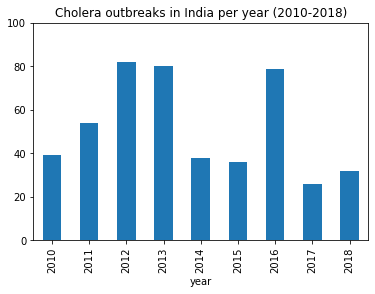

In [10]:
# outbreaks per year
outbreaks[['year', 'outbreak']].groupby('year').sum().plot.bar(title='Cholera outbreaks in India per year (2010-2018)', legend=0)
plt.ylim(0,100)
plt.show()

### Validation of cholera outbreaks per state for 2011 to 2015

The number of cholera outbreaks per state for 2011 to 2015 is available at the [IDSP](https://www.idsp.nic.in/index1.php?lang=1&level=1&sublinkid=5803&lid=3751). The following table has been created from these reports.

In [11]:
validation_data = pd.read_csv('../data/cholera_outbreaks_validation_2011_2015.csv')

In [12]:
validation_data.shape

(37, 6)

In [13]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   37 non-null     object
 1   2011    37 non-null     int64 
 2   2012    37 non-null     int64 
 3   2013    37 non-null     int64 
 4   2014    37 non-null     int64 
 5   2015    37 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.9+ KB


In [14]:
validation_data.head()

,State,2011,2012,2013,2014,2015
0,Andaman & Nicobar,0,0,0,0,0
1,Andhra Pradesh,0,1,2,0,1
2,Arunachal Pradesh,0,0,0,0,0
3,Assam,5,8,5,1,0
4,Bihar,0,0,0,2,0


In [15]:
validation_data.tail(1)

,State,2011,2012,2013,2014,2015
36,Total,58,94,96,38,45


In [16]:
outbreaks.loc[(outbreaks['year'] >= 2011) & (outbreaks['year'] <= 2015)][['year', 'outbreak']].groupby('year').sum()

,outbreak
year,
2011,54
2012,82
2013,80
2014,38
2015,36


Unfortunately, not all existing outbreaks have been extracted for 2011 to 2015. Most likely not all outbreaks have been extracted for 2010 and 2016 to 2018 as well. We clearly need to do something about this.

### Create static map

First, we need to aggregate the outbreaks data on state and district level.

In [17]:
# aggregate outbreaks by state and district
map_data = outbreaks[['state', 'district', 'outbreak']].groupby(['state', 'district']).sum().reset_index()
map_data = pd.merge(outbreaks[['state', 'district', 'geometry']].drop_duplicates(), map_data, how='inner', on=['state', 'district'])
map_data

,state,district,geometry,outbreak
0,himachal pradesh,shimla,"POLYGON ((77.51051 30.78743, 77.50089 30.79253...",1
1,rajasthan,alwar,"POLYGON ((76.45745 27.08288, 76.44963 27.08627...",3
2,assam,dibrugarh,"POLYGON ((95.37698 27.10218, 95.37267 27.10167...",5
3,karnataka,belgaum,"POLYGON ((74.75089 15.49199, 74.74472 15.48939...",7
4,gujarat,bharuch,"MULTIPOLYGON (((72.67597 21.44681, 72.67597 21...",1
...,...,...,...,...
173,maharashtra,osmanabad,"POLYGON ((76.30530 18.09508, 76.30791 18.08997...",1
174,kerala,pathanamthitta,"POLYGON ((76.64102 9.14179, 76.65238 9.14195, ...",1
175,madhya pradesh,morena,"POLYGON ((77.50278 26.06904, 77.49266 26.07269...",1
176,madhya pradesh,gwalior,"POLYGON ((77.86558 25.75457, 77.86780 25.75763...",1


Then we need to get the geometries of states and districts.

In [18]:
india = gpd.read_file('../data/cholera_outbreaks/gadm36_IND_shp/gadm36_IND_2.shp')

In [19]:
india.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
india.shape

(666, 14)

In [21]:
india.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_0      666 non-null    object  
 1   NAME_0     666 non-null    object  
 2   GID_1      666 non-null    object  
 3   NAME_1     666 non-null    object  
 4   NL_NAME_1  0 non-null      object  
 5   GID_2      666 non-null    object  
 6   NAME_2     666 non-null    object  
 7   VARNAME_2  190 non-null    object  
 8   NL_NAME_2  0 non-null      object  
 9   TYPE_2     666 non-null    object  
 10  ENGTYPE_2  666 non-null    object  
 11  CC_2       0 non-null      object  
 12  HASC_2     626 non-null    object  
 13  geometry   666 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 73.0+ KB


In [22]:
india.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


In [23]:
# check whether crs are identical
india.crs == map_data.crs

True

In [24]:
# state polygons
states = india[['NAME_1', 'geometry']].dissolve(by='NAME_1')

In [25]:
# district polygons
districts = india[['NAME_2', 'geometry']]

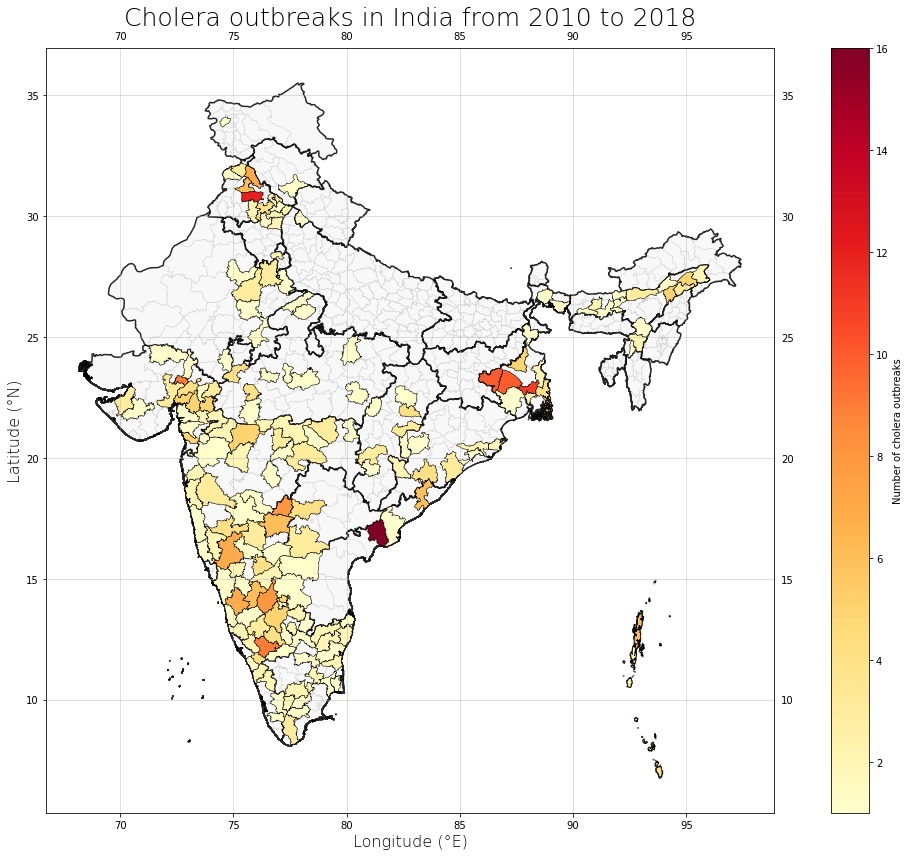

In [26]:
# create plot and set figure size
fig, ax = plt.subplots(figsize=(16,12))

# plot district boundaries 
districts.plot(ax=ax, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7)

# plot state boundaries
states.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=1.5, alpha=0.8)

# plot cholera outbreaks
map_data.plot(ax=ax, column='outbreak', cmap='YlOrRd', edgecolor='black', linewidth=0.5, legend=True, legend_kwds={'label': 'Number of cholera outbreaks'})

# set plot parameters
ax.set_title('Cholera outbreaks in India from 2010 to 2018', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_xlabel('Longitude (°E)', fontdict={'fontsize': '16', 'fontweight' : '3'})
ax.set_ylabel('Latitude (°N)', fontdict={'fontsize': '16', 'fontweight' : '3'})
plt.tick_params(labeltop=True, labelright=True)
plt.grid(alpha=0.5)
plt.tight_layout()

# save plot
plt.savefig('cholera_outbreaks_india_2010_2018.png', dpi=300)

## Essential climate variables

In [27]:
def plot_ecv(path, year, ecv_long, ecv_short):
    
    # load data
    df = gpd.read_file(os.path.join(path, 'monthly_'+ecv_short+'_'+str(year)+'.shp'))
    
    # create subplots
    fig, axs = plt.subplots(2, 2, figsize=(16,10))
    
    # plot data for January
    df[df['month'] == 1].plot(column=ecv_short, figsize=(10,10), legend=True, ax=axs[0, 0])
    axs[0, 0].set_title('January')
    axs[0, 0].set_xlabel('Longitude (°E)')
    axs[0, 0].set_ylabel('Latitude (°N)')
    axs[0, 0].grid(alpha=0.5)
    
    # plot data for April
    df[df['month'] == 4].plot(column=ecv_short, figsize=(10,10), legend=True, ax=axs[0, 1])
    axs[0, 1].set_title('April')
    axs[0, 1].set_xlabel('Longitude (°E)')
    axs[0, 1].set_ylabel('Latitude (°N)')
    axs[0, 1].grid(alpha=0.5)
    
    # plot data for July
    df[df['month'] == 7].plot(column=ecv_short, figsize=(10,10), legend=True, ax=axs[1, 0])
    axs[1, 0].set_title('July')
    axs[1, 0].set_xlabel('Longitude (°E)')
    axs[1, 0].set_ylabel('Latitude (°N)')
    axs[1, 0].grid(alpha=0.5)
    
    # plot data for October
    df[df['month'] == 10].plot(column=ecv_short, figsize=(10,10), legend=True, ax=axs[1, 1])
    axs[1, 1].set_title('October')
    axs[1, 1].set_xlabel('Longitude (°E)')
    axs[1, 1].set_ylabel('Latitude (°N)')
    axs[1, 1].grid(alpha=0.5)
    
    # set figure title
    plt.suptitle('{} {}'.format(ecv_long, year), fontsize=16)
    
    plt.tight_layout()
    plt.show()
    
    # save plot
    fig.savefig('{}_{}.png'.format(ecv_short, year), dpi=300)

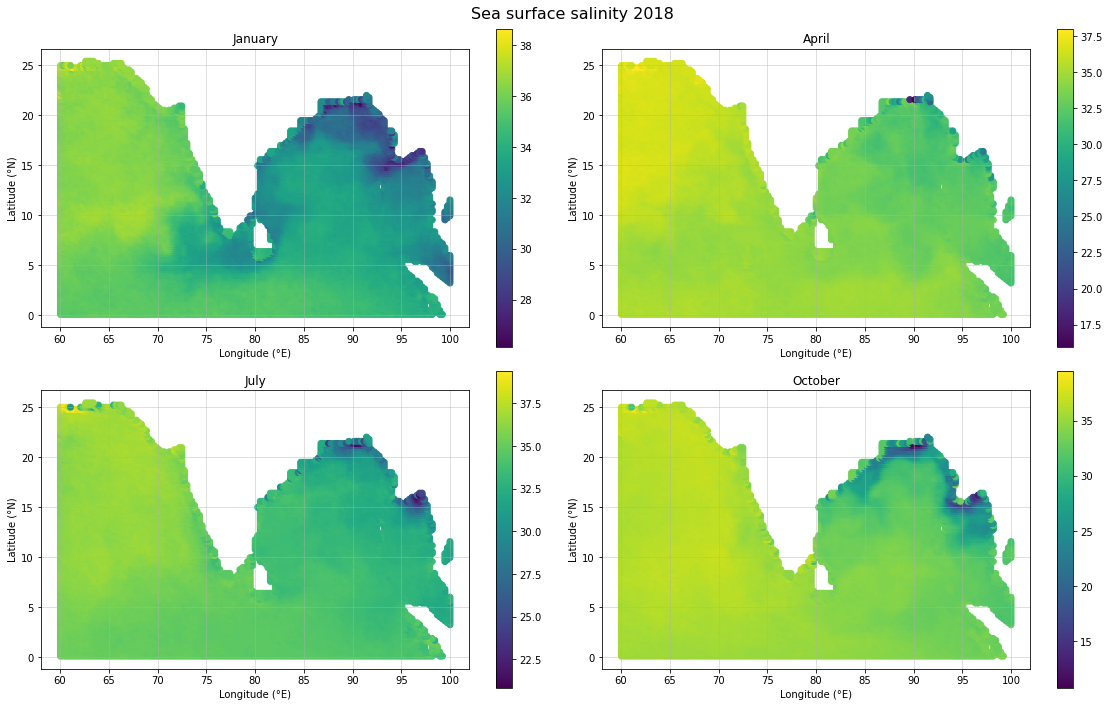

CPU times: user 31 s, sys: 465 ms, total: 31.4 s
Wall time: 31.2 s


In [28]:
%%time

plot_ecv('../data/sea_surface_salinity', 2018, 'Sea surface salinity', 'sss')

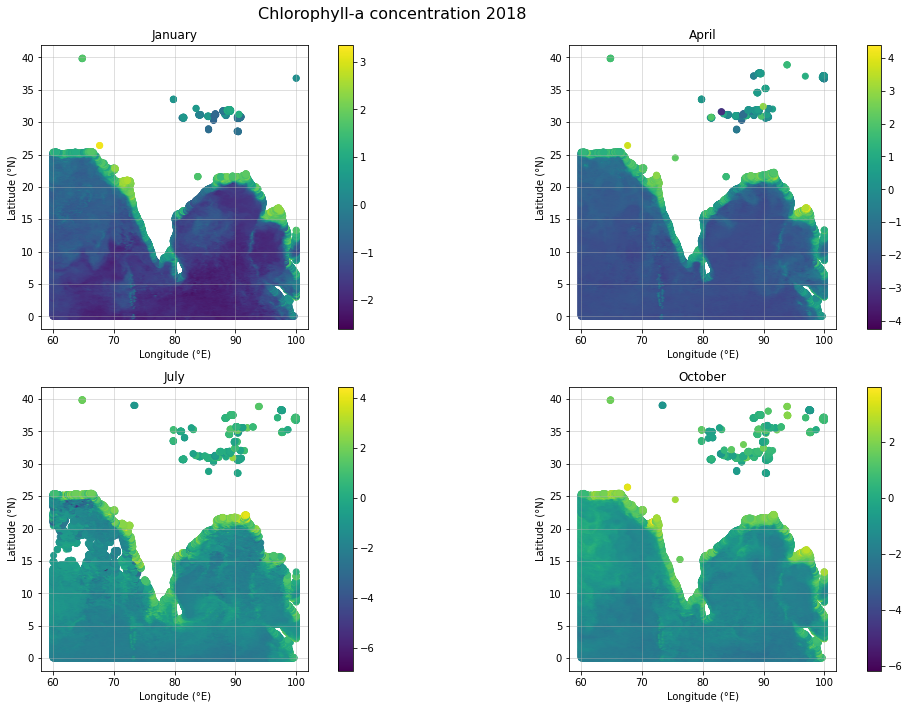

CPU times: user 12min 42s, sys: 9.2 s, total: 12min 51s
Wall time: 12min 47s


In [29]:
%%time

plot_ecv('../data/chlorophyll_a_concentration', 2018, 'Chlorophyll-a concentration', 'chlora')

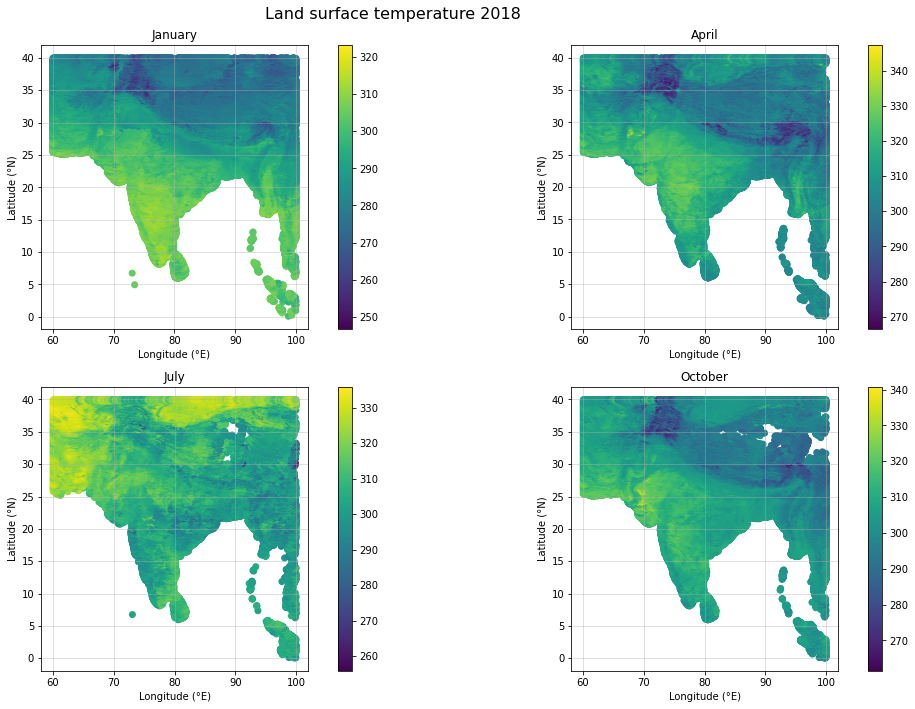

CPU times: user 8min 27s, sys: 3.83 s, total: 8min 31s
Wall time: 8min 27s


In [30]:
%%time

plot_ecv('../data/land_surface_temperature', 2018, 'Land surface temperature', 'lst')